In [1]:
#Team Members
#Naga Goutham Nidumukkala - 101177048
#Amarendra Kadamabala - 101165387
#Venkat karthik Poreddy - 101167776
#Yeswanth Ravi Sandu - 101165785
#Madhava Seeta Ramaiah Kosana - 101145085

In [2]:
#Importing Necessary Libraries
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
from sklearn.model_selection import KFold
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns


In [3]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

# Preprocess the data
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0


In [4]:
# Define the CNN model architecture
def create_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model


In [5]:
# Define k-fold cross-validation
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Initialize lists to store results
fold_accuracy = []
fold_loss = []
fold_train_accuracy = []  # Added to track training accuracy
all_y_true = []
all_y_pred = []


C:\Users\nagag\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/8
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.9043 - loss: 0.2928 - val_accuracy: 0.9843 - val_loss: 0.0520
Epoch 2/8
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.9877 - loss: 0.0425 - val_accuracy: 0.9888 - val_loss: 0.0364
Epoch 3/8
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 29s 20ms/step - accuracy: 0.9913 - loss: 0.0254 - val_accuracy: 0.9862 - val_loss: 0.0484
Epoch 4/8
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 29s 20ms/step - accuracy: 0.9934 - loss: 0.0209 - val_accuracy: 0.9899 - val_loss: 0.0416
Epoch 5/8
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.9956 - loss: 0.0138 - val_accuracy: 0.9902 - val_loss: 0.0322
Epoch 6/8
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.9960 - loss: 0.0121 - val_accuracy: 0.9908 - val_loss: 0.0396
Epoch 7/8
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.9971 - loss: 0.0092 - val_accuracy: 0.9883 - val_loss: 0.0533
Epoch 8/8
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 33s 22ms/step - accuracy: 0.9976 - loss: 0

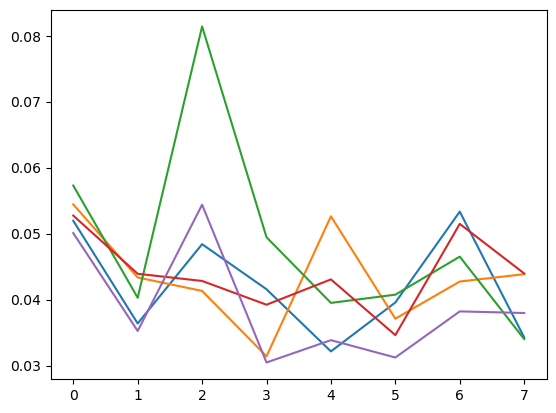

In [6]:
# Perform k-fold cross-validation
for fold, (train_index, val_index) in enumerate(kf.split(x_train), 1):  # Added fold counter
    X_train, X_val = x_train[train_index], x_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    model = create_model()
    history = model.fit(X_train, y_train_fold, epochs=8, batch_size=32, validation_data=(X_val, y_val_fold))

    # Record accuracy and loss
    fold_accuracy.append(history.history['val_accuracy'])
    fold_loss.append(history.history['val_loss'])
    fold_train_accuracy.append(history.history['accuracy'])  # Added training accuracy

    # Predictions
    y_pred = np.argmax(model.predict(X_val), axis=1)
    all_y_true.extend(y_val_fold)
    all_y_pred.extend(y_pred)

    # Plot validation loss for each fold
    plt.plot(history.epoch, history.history['val_loss'], label=f'Fold {fold} Validation Loss')


In [8]:
# Print average training and validation accuracy across folds
avg_train_accuracy = np.mean(fold_train_accuracy, axis=0)
avg_val_accuracy = np.mean(fold_accuracy, axis=0)
print('Average Training Accuracy across epochs:', avg_train_accuracy)
print('Average Validation Accuracy across epochs:', avg_val_accuracy)


Average Training Accuracy across epochs: [0.95779165 0.98649583 0.99062084 0.993075   0.994675   0.99556667
 0.996325   0.99695834]
Average Validation Accuracy across epochs: [0.98355    0.98773333 0.98375001 0.9893     0.98861667 0.99065001
 0.98868333 0.99043334]


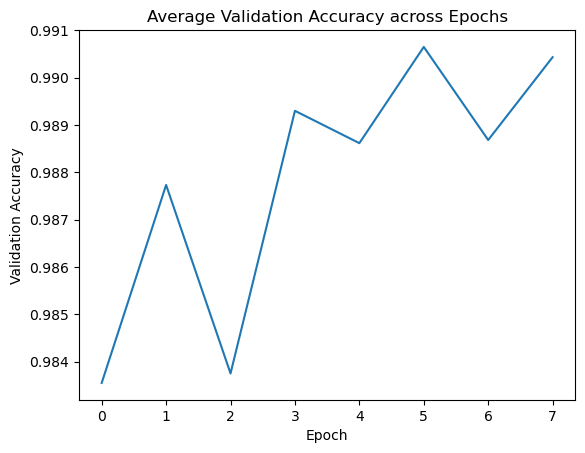

In [9]:
# Plot the average validation accuracy across epochs
plt.plot(avg_val_accuracy)
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.title('Average Validation Accuracy across Epochs')
plt.show()


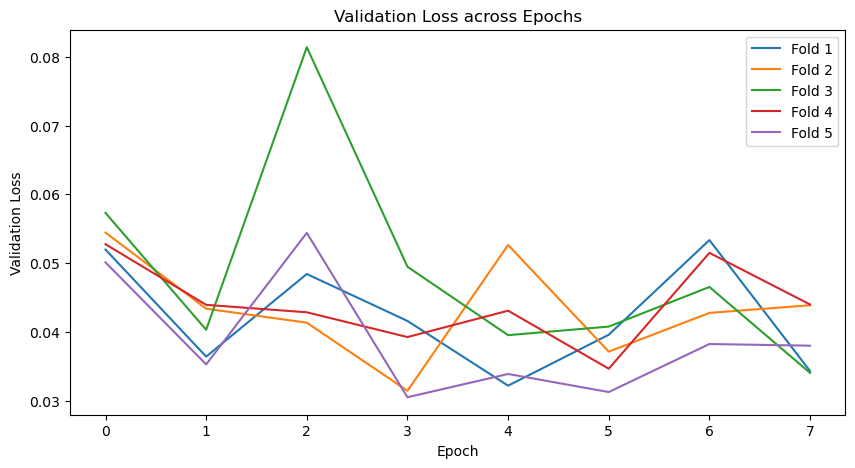

In [14]:
# Plot the validation loss across epochs for each fold
plt.figure(figsize=(10, 5))
for i in range(len(fold_loss)):
    plt.plot(history.epoch, fold_loss[i], label=f'Fold {i+1}')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.title('Validation Loss across Epochs')
plt.legend()
plt.show()


Overall accuracy: 0.9904333333333334
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5923
           1       0.99      0.99      0.99      6742
           2       0.99      0.99      0.99      5958
           3       0.99      0.99      0.99      6131
           4       0.99      0.99      0.99      5842
           5       0.99      0.99      0.99      5421
           6       0.99      0.99      0.99      5918
           7       0.99      0.99      0.99      6265
           8       0.99      0.99      0.99      5851
           9       0.99      0.98      0.99      5949

    accuracy                           0.99     60000
   macro avg       0.99      0.99      0.99     60000
weighted avg       0.99      0.99      0.99     60000



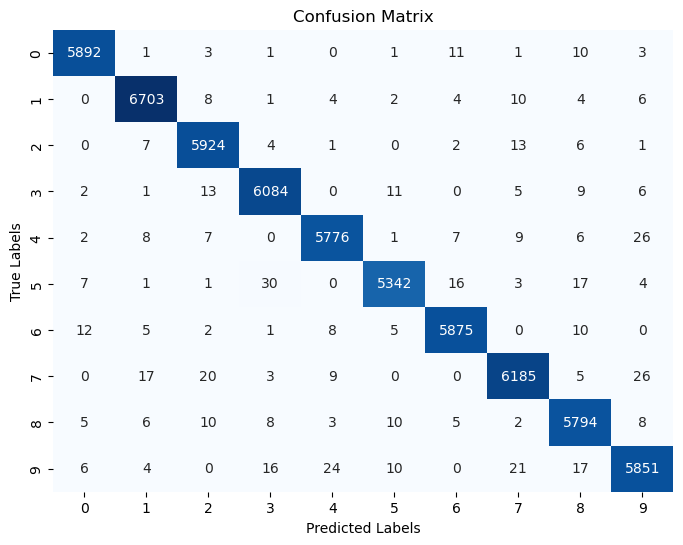

In [15]:
# Calculate overall accuracy
overall_accuracy = accuracy_score(all_y_true, all_y_pred)
print('Overall accuracy:', overall_accuracy)

# Classification report
classification_rep = classification_report(all_y_true, all_y_pred)
print(classification_rep)

# Confusion matrix
conf_matrix = confusion_matrix(all_y_true, all_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
